

Downloaded the Suspensions and Expulsions School Level (SL) and City Wide (CW) reports as Excel files from https://www.cps.edu/about/district-data/metrics/ which can be found at the bottom of the page. For the remainder of this EDA, the data from the CW report will be referred to as District Level (DL) data.

Within Excel:
-Removed the Overview tab from both files.
-Removed footnotes from SL file as it created rows full of only NA values after saving as CSV.
-Removed top header and used subheaders as headers to avoid reading issues with loading into DF.
-After the above steps were taken, saved both files as a CSV with UTF-8 encoding.
-Notes:  Superscripts get saved as normal numbers, i.e., test^2 would save as test2. Kept as is.
         Various data types became object types; had to astype relevent columns to int before creating visualizations.

Within Visual Studio Code:
-Loaded semi-cleaned data
-Began visual exploration.

Notes:
-EOY:  Data from 7/1 to 6/30 of the respective year; includes S1 data. Opted to focus on EOY data.
-Superscript 2: All CPS schools should document and track all misconducts that arise to the level of an Office Disciplinary Referral and are Student Code of Conduct infractions.
-The # of Misconducts displayed here represents all Student Code of Conduct infractions that have been reported through IMPACT Verify each school year.
-Superscript 3: Group 1-2 Example: Leaving class without permission
-Superscript 4: Group 3-4 Example: Fighting
-Superscript 5: Group 5-6 Example: Gang activity
-Schools are able to apply both an in school and out of school suspension to one misconduct event. In those cases, the suspension is only counted once.
-Misconduct and suspension data includes only district-managed schools; Expulsion data includes all district-managed and charter schools.
-Over 100 charts were created in the iniitial visual exploration. For the sake of brevity, only a small portion remained for this EDA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#sl = School Level
sl_2022 = pd.read_csv("misconduct_report_police_and_expulsion_thru_eoy_2022_school_level.csv")

#dl = District Level
dl_2022 = pd.read_csv("misconduct_report_police_and_expulsion_thru_eoy_2022_district_level.csv")

In [4]:
dl_2022.head()

,Category,School Year,Time Period1,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Suspensions6,% of Misconducts Resulting in a Suspension,# of ISS,...,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,# of Students Expelled.1,Expulsions per 100 Students.1,# of Students Expelled.2,Expulsions per 100 Students.2,Unnamed: 32
0,District Wide,2013-2014,S1,61661.0,31505.0,26153.0,4003.0,45455.0,73.7,20226.0,...,0.68,1864.0,0.6,205.0,0.06,70.0,0.02,135.0,0.28,NaN
1,District Wide,2013-2014,EOY,120543.0,58906.0,53311.0,8326.0,87763.0,72.8,38055.0,...,1.46,3543.0,1.2,495.0,0.17,184.0,0.06,311.0,0.79,NaN
2,District Wide,2014-2015,S1,60026.0,35577.0,20971.0,3478.0,27601.0,46.0,17675.0,...,0.61,1671.0,0.5,138.0,0.04,20.0,0.01,118.0,0.23,NaN
3,District Wide,2014-2015,EOY,132529.0,74771.0,49841.0,7917.0,63031.0,47.6,38668.0,...,1.42,3347.0,1.1,430.0,0.15,111.0,0.04,319.0,0.78,NaN
4,District Wide,2015-2016,S1,60093.0,34187.0,22244.0,3662.0,26924.0,44.8,16747.0,...,0.48,1340.0,0.4,138.0,0.04,34.0,0.01,104.0,0.20,NaN


In [5]:
dl_2022['Category'].unique()

array(['District Wide', 'Male', 'Female', 'Non-Binary Gender',
       'Students With IEPs', 'English Language Learners', 'White',
       'African American', 'Native American / Alaskan',
       'Asian / Pacific Islander 7', 'Hispanic', 'Multiracial', 'Asian',
       'Hawaiian / Pacific Islander', 'Race Not Available', 'White Male',
       'White Female', 'White Non-Binary', 'African American Male',
       'African American Female', 'African American Non-Binary',
       'Native American / Alaskan Male',
       'Native American / Alaskan Female',
       'Asian / Pacific Islander Male 7',
       'Asian / Pacific Islander Female 7', 'Hispanic Male',
       'Hispanic Female', 'Hispanic Non-Binary', 'Multiracial Male',
       'Multiracial Female', 'Mutlracial Nonbinary', 'Asian Male',
       'Asian Female', 'Hawaiian / Pacific Islander Male',
       'Hawaiian / Pacific Islander Female', 'Race Not Available Male',
       'Race Not Available Female', 'Grade PK-2', 'Grade 3-5',
       'Grade 6-8

In [6]:
# Starting off the exploration looking into District Level data, specifically within the Pre-Kindergarten to Second Grade level.

PK2 = dl_2022.loc[(dl_2022['Category'] == 'Grade PK-2') & (dl_2022['Time Period1'] == 'EOY')]
PK2.head(25)

,Category,School Year,Time Period1,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Suspensions6,% of Misconducts Resulting in a Suspension,# of ISS,...,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,# of Students Expelled.1,Expulsions per 100 Students.1,# of Students Expelled.2,Expulsions per 100 Students.2,Unnamed: 32
582,Grade PK-2,2013-2014,EOY,5014.0,2353.0,2413.0,248.0,2243.0,44.7,410.0,...,0.04,33.0,0.0,1.0,0.0,NaN,NaN,1.0,0.00,NaN
584,Grade PK-2,2014-2015,EOY,6012.0,3731.0,2140.0,141.0,215.0,3.6,121.0,...,0.05,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Grade PK-2,2015-2016,EOY,5450.0,3481.0,1819.0,150.0,25.0,0.5,3.0,...,0.05,34.0,0.0,2.0,0.0,NaN,NaN,2.0,0.01,NaN
588,Grade PK-2,2016-2017,EOY,4655.0,2887.0,1637.0,131.0,18.0,0.4,5.0,...,0.06,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,Grade PK-2,2017-2018,EOY,4703.0,3135.0,1470.0,98.0,21.0,0.4,4.0,...,0.06,42.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,Grade PK-2,2018-2019,EOY,4648.0,3186.0,1264.0,198.0,26.0,0.6,12.0,...,0.04,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,Grade PK-2,2019-2020,EOY,1737.0,1059.0,633.0,45.0,10.0,0.6,4.0,...,0.02,15.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,Grade PK-2,2020-2021,EOY,288.0,197.0,80.0,11.0,1.0,0.3,NaN,...,0.00,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,Grade PK-2,2021-2022,EOY,2104.0,1182.0,863.0,59.0,3.0,0.1,NaN,...,0.03,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


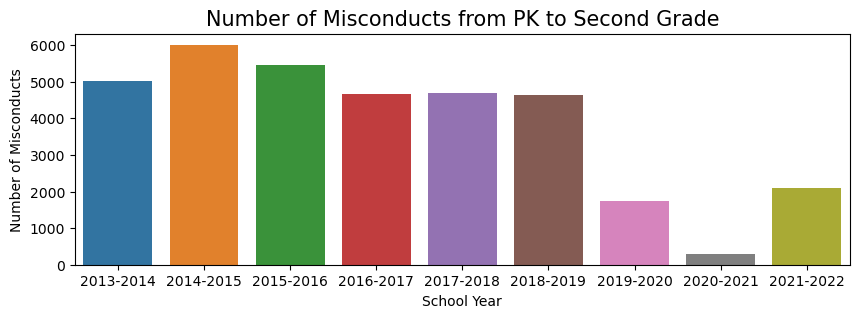

In [7]:
sns.set_palette(palette='tab10')
plt.figure(figsize=(10,3))
sns.barplot(x = PK2['School Year'], y = PK2['# of Misconducts2'])

plt.title('Number of Misconducts from PK to Second Grade', size = 15);
plt.xlabel('School Year');
plt.ylabel('Number of Misconducts');

Similar styled bar plots were created to visually explore the following:  Breakdown of the Number of Misconducts by Group (severity, i.e., Groups 1-6) from PK to Second Grade before bringing them together. Then the number of Suspensions from PK to Second Grade and the Percent of Misconducts resulting in Suspension from PK to Second Grade were explored.

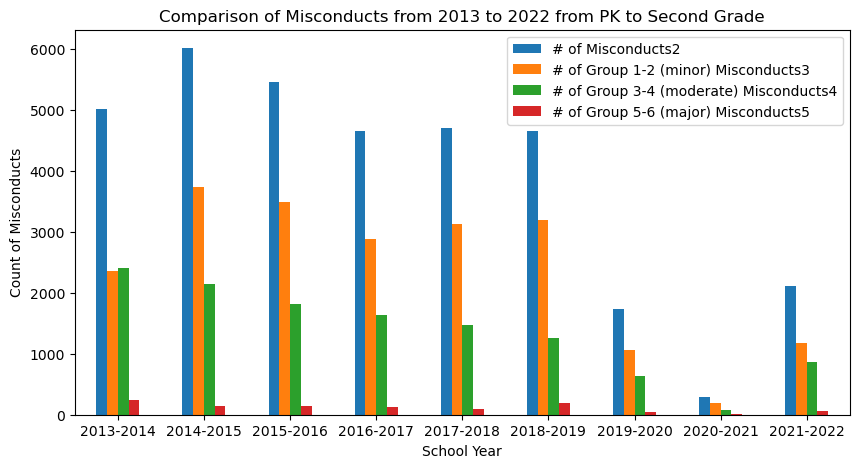

In [8]:
plt.rcParams['figure.figsize'] = (10,5)
ax = PK2.plot(x ='School Year',
    y=['# of Misconducts2','# of Group 1-2 (minor) Misconducts3','# of Group 3-4 (moderate) Misconducts4','# of Group 5-6 (major) Misconducts5'],
    kind='bar',
    rot=0,
    title='Comparison of Misconducts from 2013 to 2022 from PK to Second Grade')
#ax.set_xlabel('')
ax.set_ylabel('Count of Misconducts');

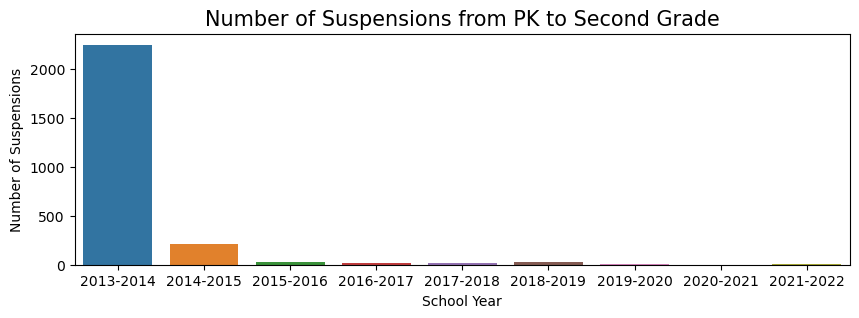

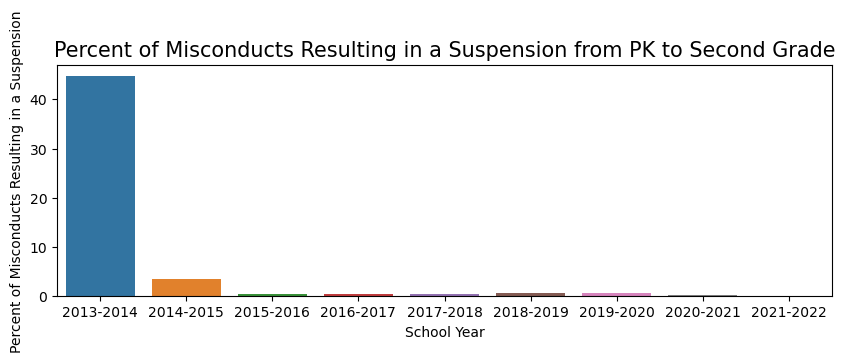

In [9]:
sns.set_palette(palette='tab10')
plt.figure(figsize=(10,3))
sns.barplot(x = PK2['School Year'], y = PK2['# of Suspensions6'])

plt.title('Number of Suspensions from PK to Second Grade', size = 15);
plt.xlabel('School Year');
plt.ylabel('Number of Suspensions');

sns.set_palette(palette='tab10')
plt.figure(figsize=(10,3))
sns.barplot(x = PK2['School Year'], y = PK2['% of Misconducts Resulting in a Suspension'])

plt.title('Percent of Misconducts Resulting in a Suspension from PK to Second Grade', size = 15);
plt.xlabel('School Year');
plt.ylabel('Percent of Misconducts Resulting in a Suspension');

The 2013-2014 school year has an unexpectedly higher number of both suspensions and percept of misconducts resulting in a suspension than expected. Similarly and despite being relatively low, it's surprising to see Group 5-6 misconducts within this grade range.

The above process was repeated for the following Grades:  3-5, 6-8, and 9-12. Nothing seemed too surprising within those data, but seeing the dropoff of misconducts as COVID-19 restrictions were implemented could be a potential point of interest.

The next visual rabbit hole consisted of looking into data by year as opposed to by grade.

In [14]:
SY1314 = dl_2022.loc[(dl_2022['School Year'] == '2013-2014') & (dl_2022['Time Period1'] == 'EOY') & ((dl_2022['Category'] == 'Grade PK-2') | (dl_2022['Category'] == 'Grade 3-5') | (dl_2022['Category'] == 'Grade 6-8') | (dl_2022['Category'] == 'Grade 9-12'))]

In [12]:
SY1314.head()

,Category,School Year,Time Period1,# of Misconducts2,# of Group 1-2 (minor) Misconducts3,# of Group 3-4 (moderate) Misconducts4,# of Group 5-6 (major) Misconducts5,# of Suspensions6,% of Misconducts Resulting in a Suspension,# of ISS,...,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students,# of Students Expelled.1,Expulsions per 100 Students.1,# of Students Expelled.2,Expulsions per 100 Students.2,Unnamed: 32
582,Grade PK-2,2013-2014,EOY,5014.0,2353.0,2413.0,248.0,2243.0,44.7,410.0,...,0.04,33.0,0.0,1.0,0.00,NaN,NaN,1.0,0.00,NaN
600,Grade 3-5,2013-2014,EOY,13083.0,4892.0,7633.0,558.0,8027.0,61.4,1606.0,...,0.20,123.0,0.2,5.0,0.00,NaN,NaN,5.0,0.02,NaN
618,Grade 6-8,2013-2014,EOY,25247.0,9095.0,13696.0,2456.0,16774.0,66.4,3389.0,...,1.50,840.0,1.3,110.0,0.06,79.0,0.04,31.0,0.14,NaN
636,Grade 9-12,2013-2014,EOY,77182.0,42561.0,29564.0,5057.0,60702.0,78.6,32645.0,...,4.26,2543.0,3.4,377.0,0.11,103.0,0.03,274.0,0.35,NaN


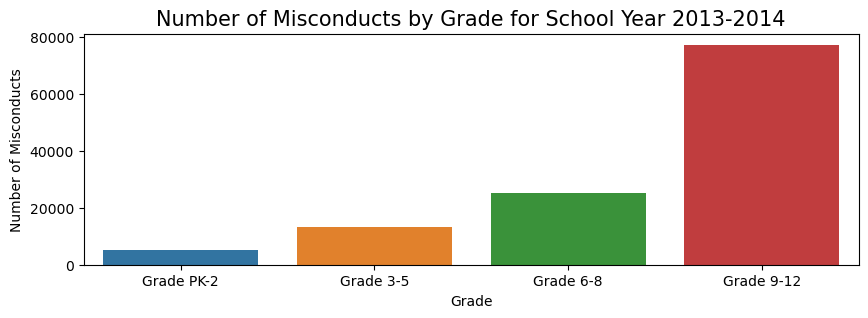

In [13]:
sns.set_palette(palette='tab10')
plt.figure(figsize=(10,3))
sns.barplot(x = SY1314['Category'], y = SY1314['# of Misconducts2'])

plt.title('Number of Misconducts by Grade for School Year 2013-2014', size = 15);
plt.xlabel('Grade');
plt.ylabel('Number of Misconducts');

This process was repeated for the following school years:  2014-2015, 2015-2016, ..., 2021-2022. The school year of 2020-2021 is the only school year where Grade 6-8 had a higher number of misconducts reported than Grade 9-12. Aside from that year, the basic trend of the above chart is prevalent.

In [15]:
SY1322PK5 = dl_2022.loc[(dl_2022['Time Period1'] == 'EOY') & ((dl_2022['Category'] == 'Grade PK-2') | (dl_2022['Category'] == 'Grade 3-5'))]
SY1322612 = dl_2022.loc[(dl_2022['Time Period1'] == 'EOY') & ((dl_2022['Category'] == 'Grade 6-8') | (dl_2022['Category'] == 'Grade 9-12'))]

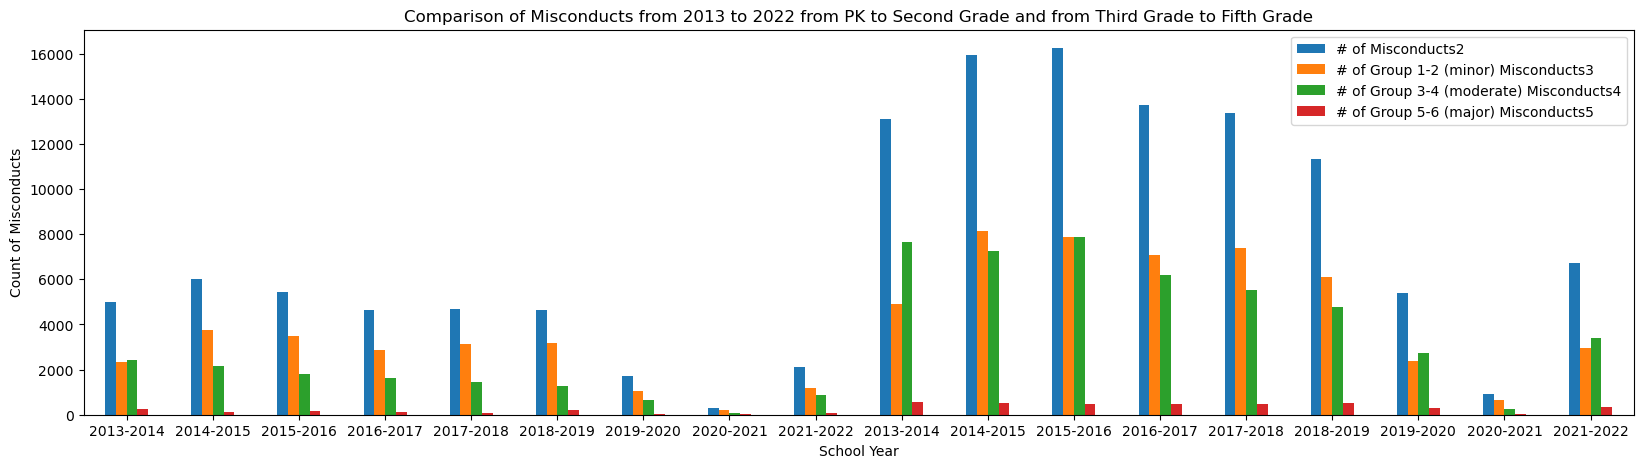

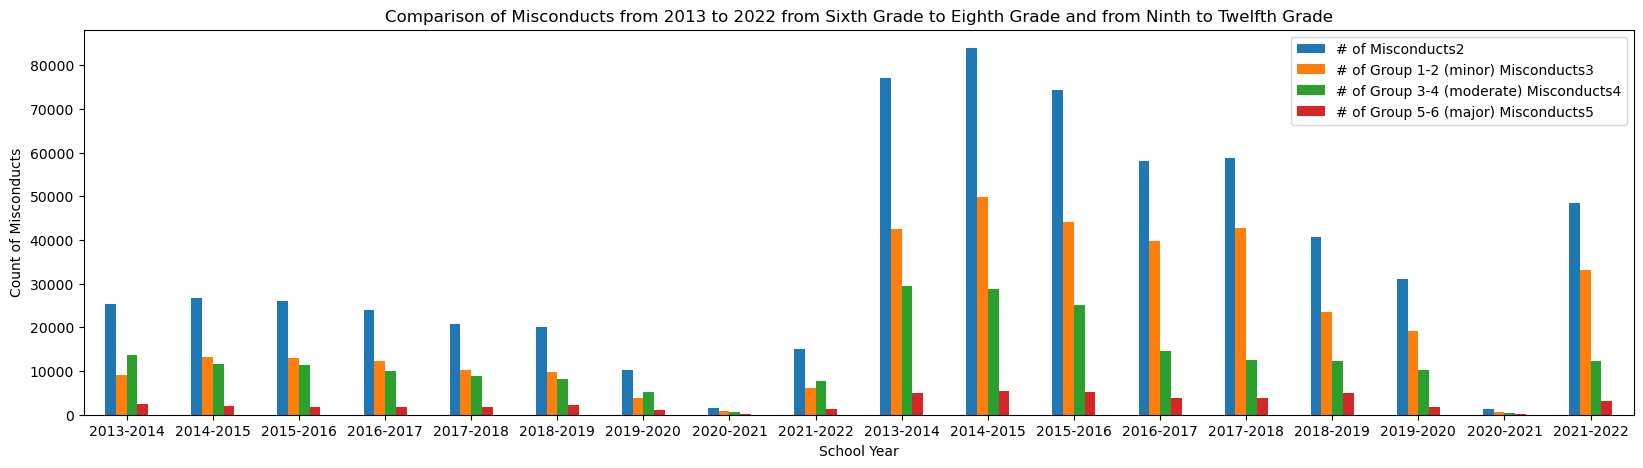

In [16]:
plt.rcParams['figure.figsize'] = (20,5)
ax = SY1322PK5.plot(x ='School Year',
    y=['# of Misconducts2','# of Group 1-2 (minor) Misconducts3','# of Group 3-4 (moderate) Misconducts4','# of Group 5-6 (major) Misconducts5'],
    kind='bar',
    rot=0,
    title='Comparison of Misconducts from 2013 to 2022 from PK to Second Grade and from Third Grade to Fifth Grade')
#ax.set_xlabel('')
ax.set_ylabel('Count of Misconducts');

plt.rcParams['figure.figsize'] = (20,5)
ax = SY1322612.plot(x ='School Year',
    y=['# of Misconducts2','# of Group 1-2 (minor) Misconducts3','# of Group 3-4 (moderate) Misconducts4','# of Group 5-6 (major) Misconducts5'],
    kind='bar',
    rot=0,
    title='Comparison of Misconducts from 2013 to 2022 from Sixth Grade to Eighth Grade and from Ninth to Twelfth Grade')
#ax.set_xlabel('')
ax.set_ylabel('Count of Misconducts');

Top left quadrant is PK to Second Grade, top right quadrant is Third to Fifth Grade, bottom left quadrant is Sixth to Eighth Grade, and the final quadrant is Ninth to Twelfth Grade. Probably could've used subplots to make the visualization more clear, but this style is my sort of go-to.

Ignoring everything (health complications and so on) aside from Misconducts within the Chicago Public Schools, COVID seemed to have some positive effects.

Moving onward to the School Level data now.

In [18]:
sl_2022.head(10)

,School ID,School Name,School Network,School Year,Time Period,# of Misconducts,# of Group 1-2 Misconducts,# of Group 3-4 Misconducts,# of Group 5-6 Misconducts,# of Suspensions (includes ISS and OSS),...,# of Unique Students Receiving OSS,% of Unique Students Receiving OSS,Average Length of OSS,# of Police Notifications,% of Misconducts Resulting in a Police Notification,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students
0,400121,ACERO - DE LA CRUZ,Charter,2017-2018,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.15
1,400081,ACERO - DE LAS CASAS,Charter,2018-2019,S1,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.38
2,400081,ACERO - DE LAS CASAS,Charter,2018-2019,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.38
3,400085,ACERO - GARCIA HS,Charter,2017-2018,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,2,0.33
4,400089,ACERO - MARQUEZ,Charter,2017-2018,S1,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.18
5,400089,ACERO - MARQUEZ,Charter,2017-2018,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,1,0.18
6,400149,ACERO - SOTO HS,Charter,2019-2020,EOY,--,--,--,--,--,...,--,--,--,--,--,--,--,--,2,0.39
7,609772,ADDAMS,Network 13,2013-2014,S1,8,1,7,0,6,...,4,0.5,1,0,0,0,0,0,0,0.00
8,609772,ADDAMS,Network 13,2013-2014,EOY,12,1,9,2,10,...,4,0.5,1,0,0,0,0,0,0,0.00
9,609772,ADDAMS,Network 13,2014-2015,S1,7,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0.00


In [19]:
SL1314 = sl_2022.loc[(sl_2022['School Year'] == '2013-2014') & (sl_2022['Time Period'] == 'EOY') & (sl_2022['# of Misconducts'] != '--')]
SL1314.head()

,School ID,School Name,School Network,School Year,Time Period,# of Misconducts,# of Group 1-2 Misconducts,# of Group 3-4 Misconducts,# of Group 5-6 Misconducts,# of Suspensions (includes ISS and OSS),...,# of Unique Students Receiving OSS,% of Unique Students Receiving OSS,Average Length of OSS,# of Police Notifications,% of Misconducts Resulting in a Police Notification,Police Notifications per 100 Students,# of Unique Students Receiving Police Notification,% of Unique Students Receiving Police Notification,# of Students Expelled,Expulsions per 100 Students
8,609772,ADDAMS,Network 13,2013-2014,EOY,12,1,9,2,10,...,4,0.5,1,0,0,0,0,0,0,0.0
24,609773,AGASSIZ,Network 4,2013-2014,EOY,63,19,43,1,42,...,13,2.7,1.47,1,1.6,0.21,1,0.2,0,0.0
38,610513,AIR FORCE HS,Military,2013-2014,EOY,228,98,103,27,154,...,83,23.4,2.39,9,3.9,2.53,9,2.5,0,0.0
54,610212,ALBANY PARK,Network 1,2013-2014,EOY,38,22,11,5,10,...,7,2.5,2.22,6,15.8,2.13,4,1.4,0,0.0
71,609774,ALCOTT ES,Network 4,2013-2014,EOY,36,31,4,1,8,...,2,0.4,6,1,2.8,0.19,1,0.2,0,0.0


In [20]:
SL1314['School Name'].nunique()

523

In [21]:
print(np.dtype(SL1314['# of Misconducts']))

object


In [23]:
SL1314 = SL1314.astype({'School Name': str, '# of Misconducts': int})
print(np.dtype(SL1314['# of Misconducts']))

int32


After the school year 2013-2014 data was extracted from the overall School Level data, smaller bin-like dataframes were created to explore four breakdowns of the number of misconducts:  Overall, between 100 and 500 misconducts, between 500 and 1000 misconducts, and above 1000 misconducts.

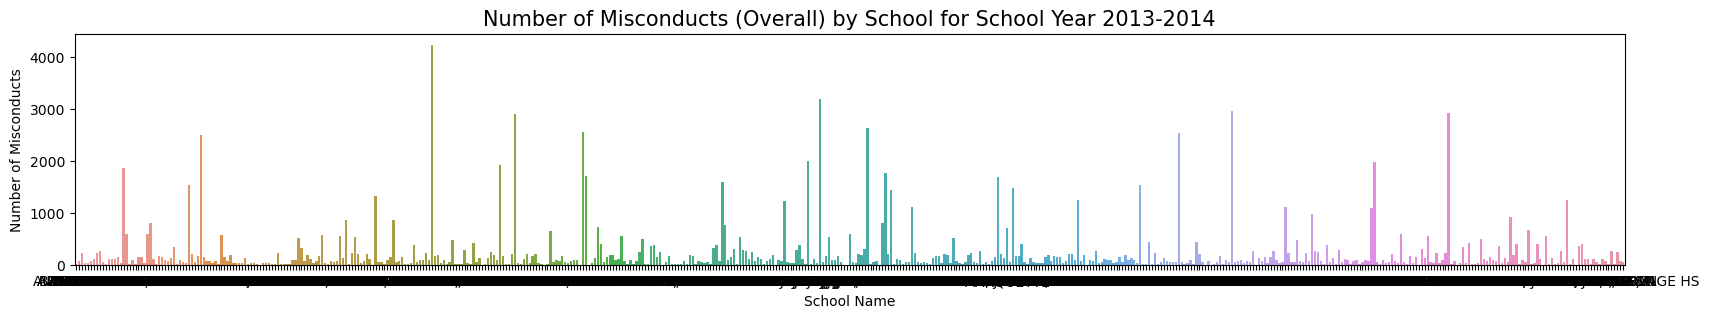

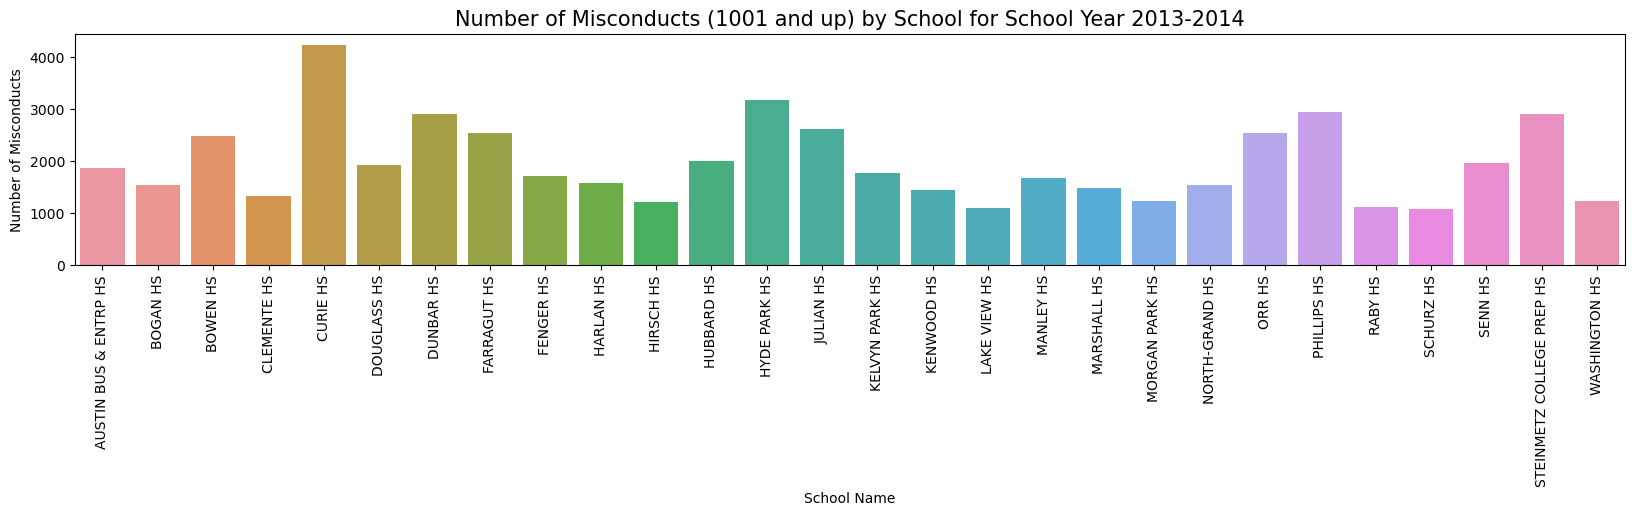

In [24]:
SL1314v1to100 = SL1314.loc[(SL1314['# of Misconducts'] <= 100)]
SL1314v101to500 = SL1314.loc[(SL1314['# of Misconducts'] <= 500) & (SL1314['# of Misconducts'] > 100)]
SL1314v501to1000 = SL1314.loc[(SL1314['# of Misconducts'] <= 1000) & (SL1314['# of Misconducts'] > 500)]
SL1314v1001to5000 = SL1314.loc[(SL1314['# of Misconducts'] > 1000)]

sns.set_palette(palette='tab10')
plt.figure(figsize=(20,3))
sns.barplot(x = SL1314['School Name'], y = SL1314['# of Misconducts'])

plt.title('Number of Misconducts (Overall) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.ylabel('Number of Misconducts');

sns.set_palette(palette='tab10')
plt.figure(figsize=(20,3))
sns.barplot(x = SL1314v1001to5000['School Name'], y = SL1314v1001to5000['# of Misconducts'])

plt.title('Number of Misconducts (1001 and up) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.xticks(rotation = 90);
plt.ylabel('Number of Misconducts');

The above process was repeated for each individual school year from 2014 to 2022 with slightly varying bin sizes dependent upon an arbirtrary amount that ended with the final bin having a manageable amount of schools.

Unsurprisingly, the 2020-2021 school year had a record low number of reported misconducts, with the school having the most misconducts reporting less than 300 for the entire school year. The 2021-2022 resumed the status quo of previous years.

The next focus of exploration involved the number of police notifications by school per school year.

In [27]:
SLPN1314 = sl_2022.loc[(sl_2022['School Year'] == '2013-2014') & (sl_2022['Time Period'] == 'EOY') & (sl_2022['# of Police Notifications'] != '--')]
print(np.dtype(SLPN1314['# of Police Notifications']))

object


In [28]:
SLPN1314 = SLPN1314.astype({'School Name': str, '# of Police Notifications': int})

In [29]:
SLPN1314v1to50 = SLPN1314.loc[(SLPN1314['# of Police Notifications'] <= 50)]
SLPN1314v51to100 = SLPN1314.loc[(SLPN1314['# of Police Notifications'] <= 100) & (SLPN1314['# of Police Notifications'] > 50)]
SLPN1314v101to5000 = SLPN1314.loc[(SLPN1314['# of Police Notifications'] > 100)]

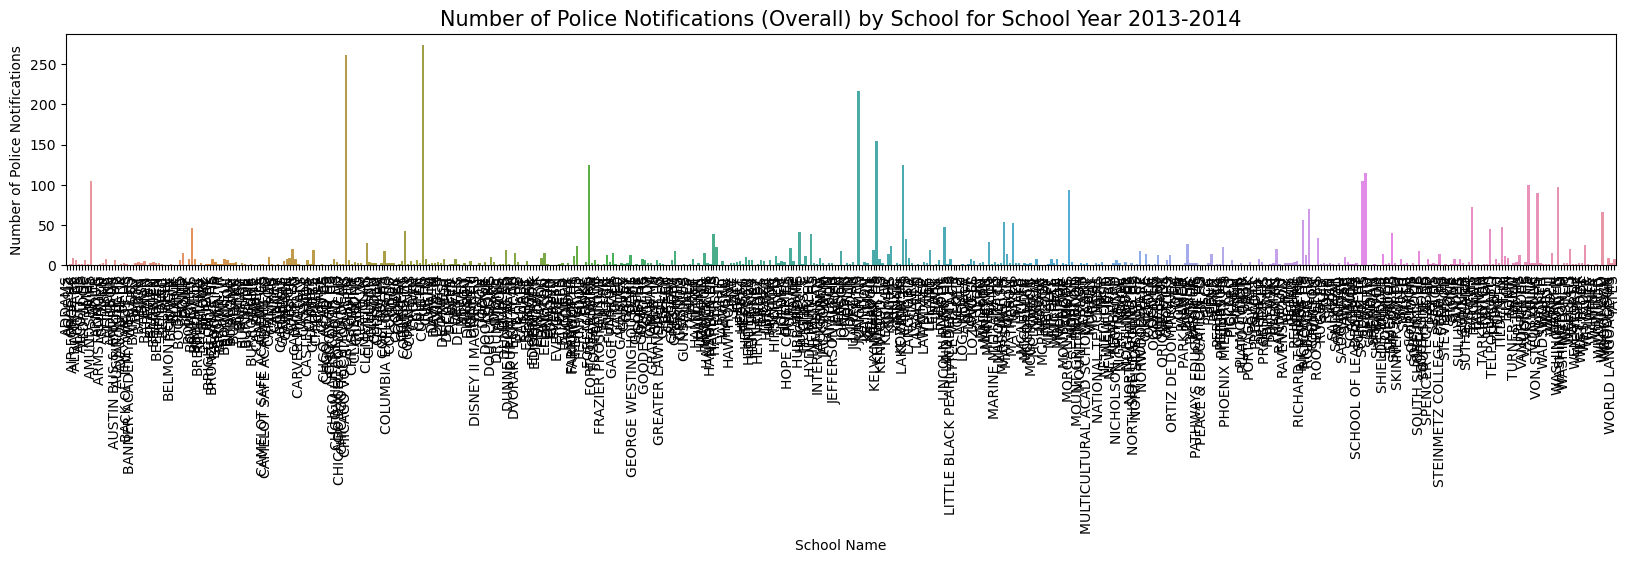

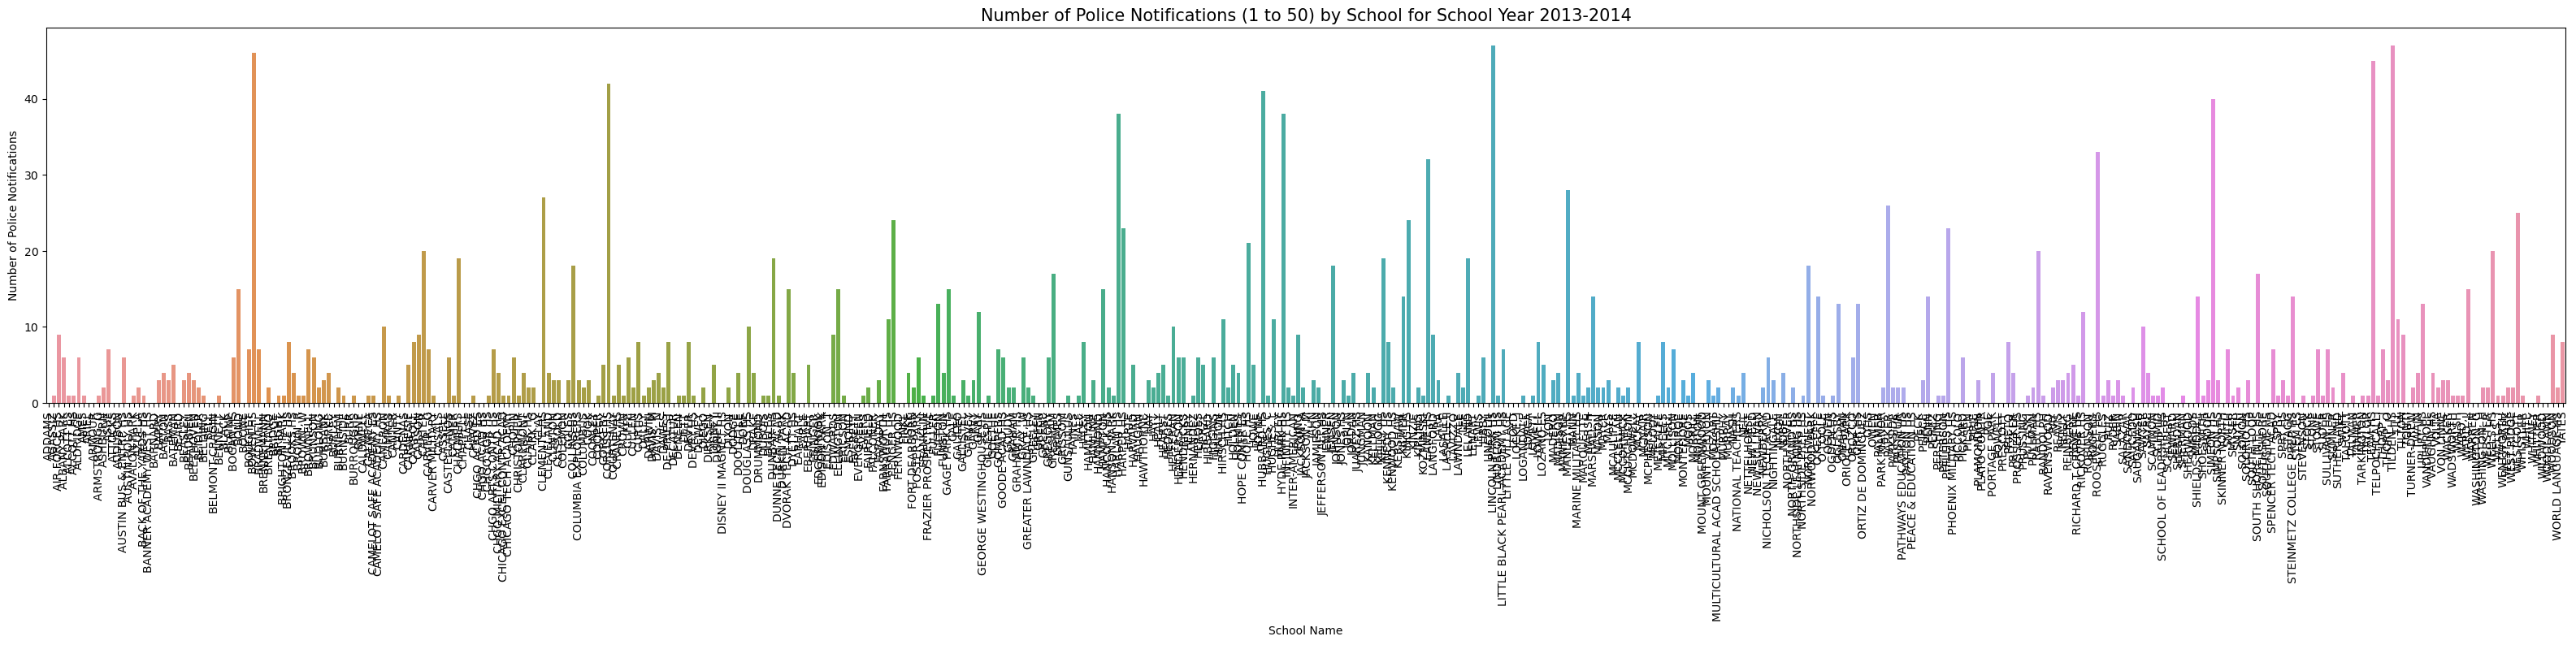

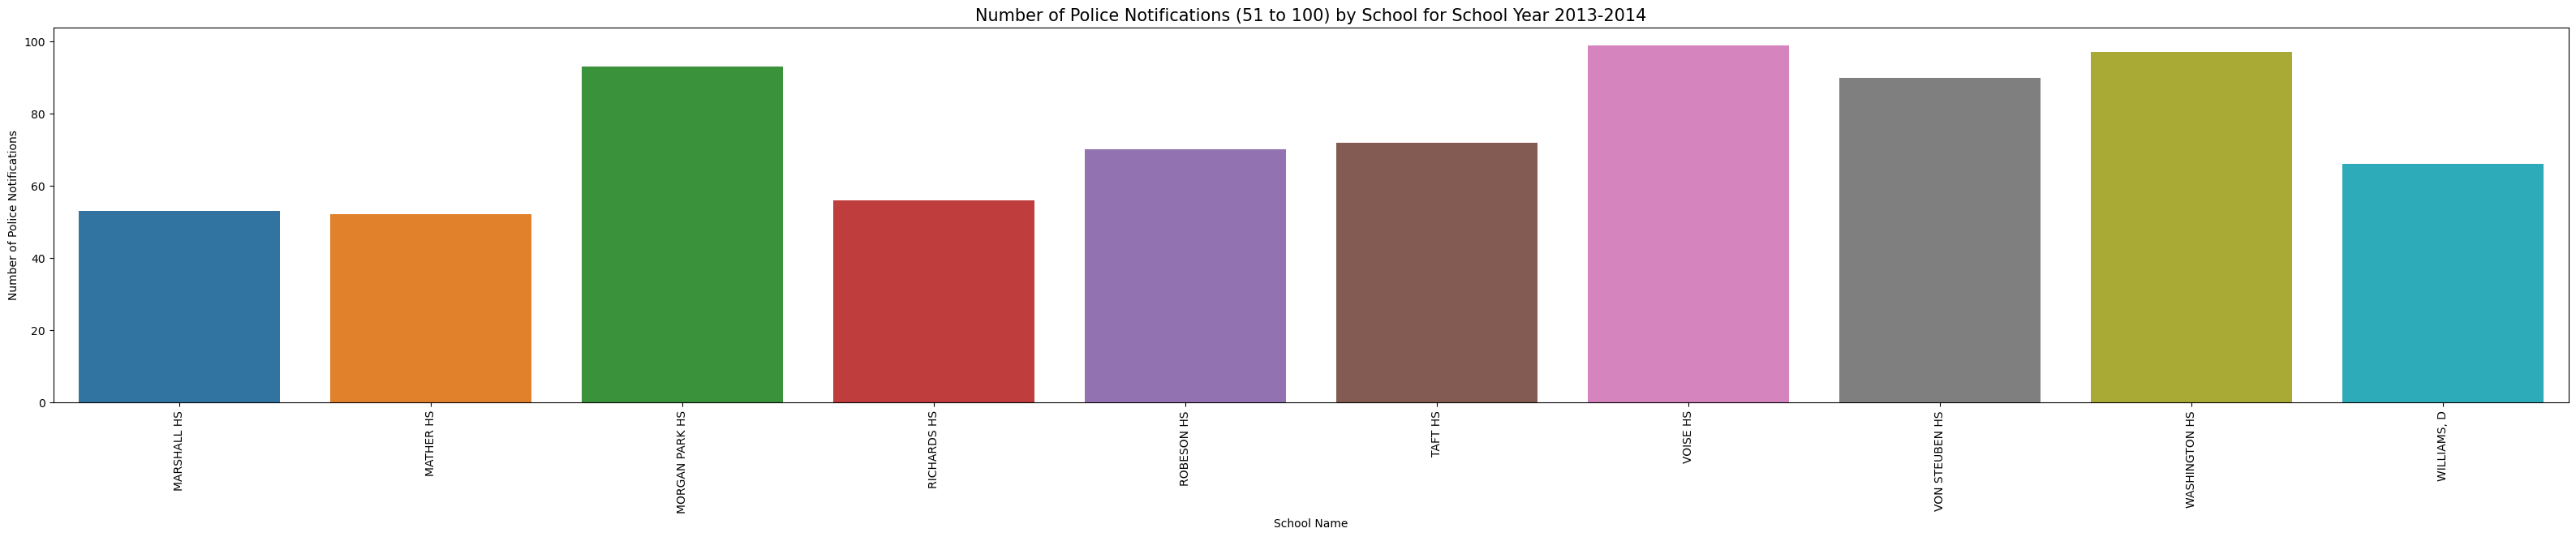

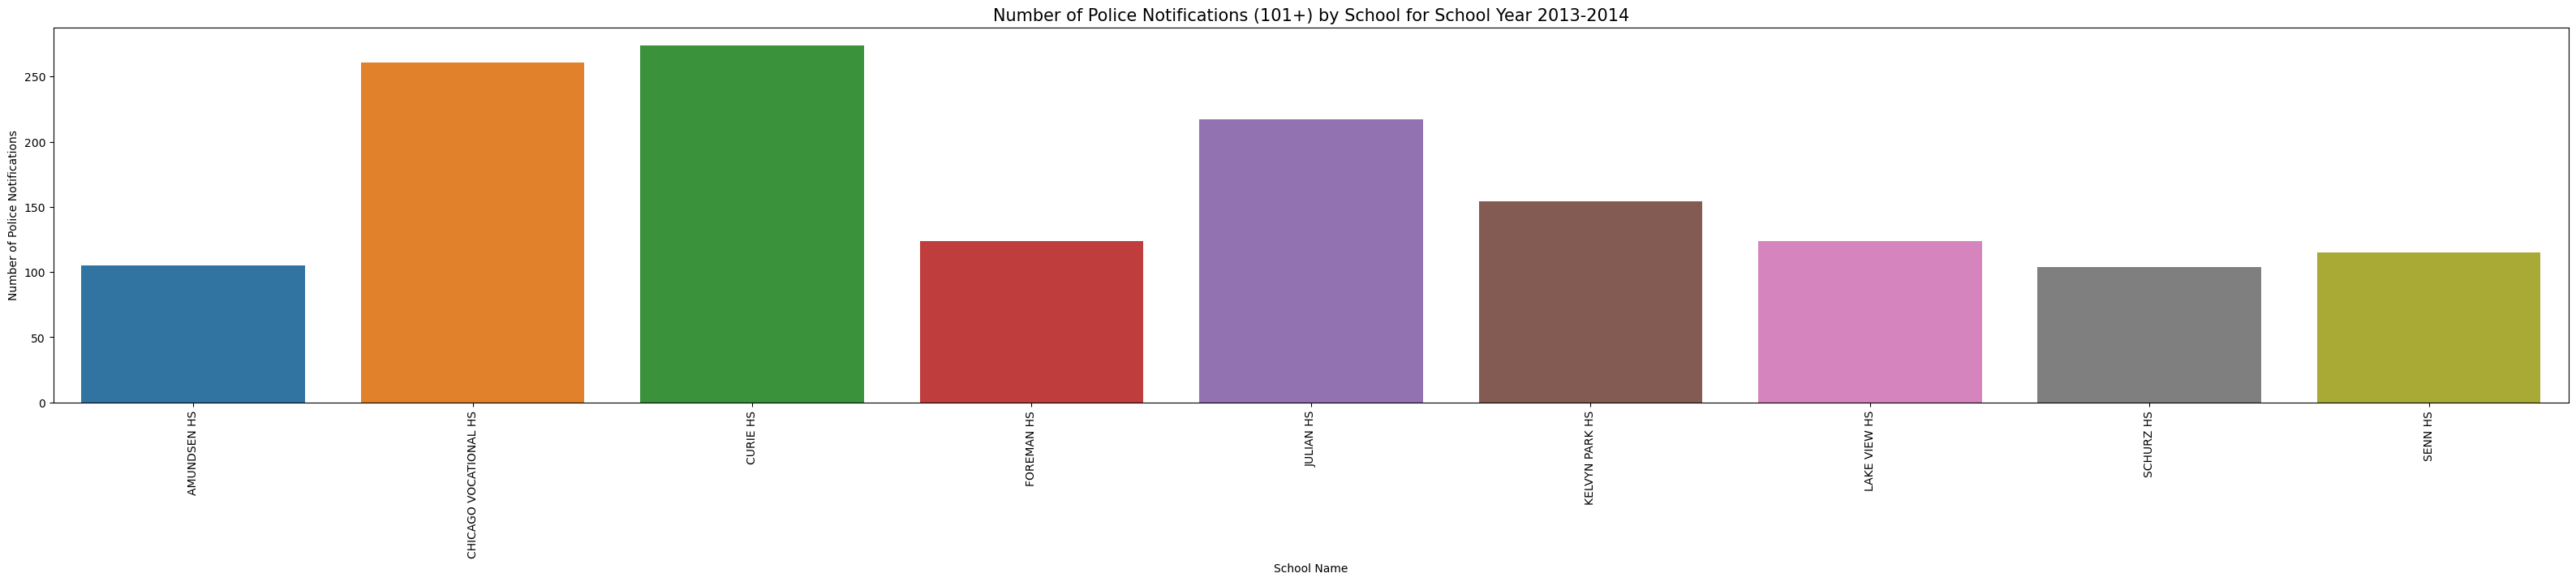

In [30]:
sns.set_palette(palette='tab10')
plt.figure(figsize=(20,3))
sns.barplot(x = SLPN1314['School Name'], y = SLPN1314['# of Police Notifications'])

plt.title('Number of Police Notifications (Overall) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.xticks(rotation = 90);
plt.ylabel('Number of Police Notifications');

#

sns.set_palette(palette='tab10')
plt.figure(figsize=(40,6))
sns.barplot(x = SLPN1314v1to50['School Name'], y = SLPN1314v1to50['# of Police Notifications'])

plt.title('Number of Police Notifications (1 to 50) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.xticks(rotation = 90);
plt.ylabel('Number of Police Notifications');

#

sns.set_palette(palette='tab10')
plt.figure(figsize=(40,6))
sns.barplot(x = SLPN1314v51to100['School Name'], y = SLPN1314v51to100['# of Police Notifications'])

plt.title('Number of Police Notifications (51 to 100) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.xticks(rotation = 90);
plt.ylabel('Number of Police Notifications');

#

sns.set_palette(palette='tab10')
plt.figure(figsize=(40,6))
sns.barplot(x = SLPN1314v101to5000['School Name'], y = SLPN1314v101to5000['# of Police Notifications'])

plt.title('Number of Police Notifications (101+) by School for School Year 2013-2014', size = 15);
plt.xlabel('School Name');
plt.xticks(rotation = 90);
plt.ylabel('Number of Police Notifications');

The same process was completed for the eight remaining school years (2014-2015, ..., 2021-2022)

The school year 2019-2020 only had a single school with more than 50 reported police notifications. 
The school year 2020-2021 did not have any schools with more than 50 reported police notifications.
The school year 2021-2022 only had a single school with more than 50 reported police notifications.

Nothing aside from the impact COVID had was of much interest.

The next bit of exploration was with crime data pulled from the City of Chicago's website.

In [31]:
# Filtered date from 07/01/2013 00:0:00 AM to 06/30/2022 11:59:59 PM on https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data
# Downloaded filtered data as CSV

cc = pd.read_csv(r'C:\Users\AlbertProuty\Downloads\Crimes_-_2001_to_Present.csv', parse_dates=True)

In [32]:
cc.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10263184,HY451000,07/01/2013 12:00:00 AM,065XX S KOMENSKY AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,...,13.0,65.0,20,1150497.0,1860853.0,2013,02/10/2018 03:50:01 PM,41.774076,-87.723862,"(41.774075726, -87.723862458)"
1,11466466,JB462168,07/01/2013 12:00:00 AM,076XX S KINGSTON AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,7.0,43.0,11,NaN,NaN,2013,10/05/2018 03:59:12 PM,NaN,NaN,NaN
2,11478321,JB477486,07/01/2013 12:00:00 AM,050XX S HERMITAGE AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,20.0,61.0,02,NaN,NaN,2013,10/25/2018 04:10:05 PM,NaN,NaN,NaN
3,10095151,HY284142,07/01/2013 12:00:00 AM,005XX E 90TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,True,...,6.0,44.0,17,1181338.0,1845421.0,2013,02/10/2018 03:50:01 PM,41.731073,-87.611280,"(41.731073247, -87.611280355)"
4,11184186,JA558116,07/01/2013 12:00:00 AM,091XX S LAFLIN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,21.0,73.0,11,NaN,NaN,2013,12/22/2017 03:49:48 PM,NaN,NaN,NaN


In [33]:
print(cc.apply(lambda col: col.unique()))

ID                      [10263184, 11466466, 11478321, 10095151, 11184...
Case Number             [HY451000, JB462168, JB477486, HY284142, JA558...
Date                    [07/01/2013 12:00:00 AM, 07/01/2013 12:01:00 A...
Block                   [065XX S KOMENSKY AVE, 076XX S KINGSTON AVE, 0...
IUCR                    [1751, 1153, 1754, 1563, 0810, 0610, 0820, 175...
Primary Type            [OFFENSE INVOLVING CHILDREN, DECEPTIVE PRACTIC...
Description             [CRIM SEX ABUSE BY FAM MEMBER, FINANCIAL IDENT...
Location Description    [RESIDENCE, OTHER, APARTMENT, STREET, CONSTRUC...
Arrest                                                      [False, True]
Domestic                                                    [True, False]
Beat                    [833, 421, 931, 633, 2221, 1123, 1811, 221, 51...
District                [8.0, 4.0, 9.0, 6.0, 22.0, 11.0, 18.0, 2.0, 5....
Ward                    [13.0, 7.0, 20.0, 6.0, 21.0, 28.0, 32.0, 3.0, ...
Community Area          [65.0, 43.0, 6

In [34]:
# Removing columns that aren't too relevant--at least not right now.

cc2 = cc[['ID', 'Date', 'Arrest', 'Beat', 'District', 'Ward', 'Community Area']]
cc2.head()

,ID,Date,Arrest,Beat,District,Ward,Community Area
0,10263184,07/01/2013 12:00:00 AM,False,833,8.0,13.0,65.0
1,11466466,07/01/2013 12:00:00 AM,False,421,4.0,7.0,43.0
2,11478321,07/01/2013 12:00:00 AM,False,931,9.0,20.0,61.0
3,10095151,07/01/2013 12:00:00 AM,False,633,6.0,6.0,44.0
4,11184186,07/01/2013 12:00:00 AM,False,2221,22.0,21.0,73.0


In [35]:
cc2['ID'].nunique()

2291313

In [36]:
cc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291313 entries, 0 to 2291312
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              int64  
 1   Date            object 
 2   Arrest          bool   
 3   Beat            int64  
 4   District        float64
 5   Ward            float64
 6   Community Area  float64
dtypes: bool(1), float64(3), int64(2), object(1)
memory usage: 107.1+ MB


In [37]:
# Getting rid of HH:MM:SS tt info in what is probably a super ineffecient way. Ignore the deprecated warning.

cc2['Date'] = [x[:10] for x in cc2['Date']]

C:\Users\AlbertProuty\AppData\Local\Temp\ipykernel_15760\3711436782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc2['Date'] = [x[:10] for x in cc2['Date']]


In [38]:
cc2.tail()

,ID,Date,Arrest,Beat,District,Ward,Community Area
2291308,12747289,06/30/2022,True,1112,11.0,37.0,23.0
2291309,12747242,06/30/2022,True,132,1.0,3.0,33.0
2291310,12747291,06/30/2022,True,1911,19.0,47.0,5.0
2291311,12747272,06/30/2022,True,725,7.0,15.0,67.0
2291312,12747309,06/30/2022,True,1812,18.0,43.0,7.0


In [39]:
cc2['Date'] = cc2['Date'].astype('datetime64')
cc2['District'] = cc2['District'].fillna(0).astype('int')

C:\Users\AlbertProuty\AppData\Local\Temp\ipykernel_15760\1304050258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc2['Date'] = cc2['Date'].astype('datetime64')
C:\Users\AlbertProuty\AppData\Local\Temp\ipykernel_15760\1304050258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc2['District'] = cc2['District'].fillna(0).astype('int')


In [40]:
cc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291313 entries, 0 to 2291312
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ID              int64         
 1   Date            datetime64[ns]
 2   Arrest          bool          
 3   Beat            int64         
 4   District        int32         
 5   Ward            float64       
 6   Community Area  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(2)
memory usage: 98.3 MB


In [41]:
# Time to check out some police data for each of the school years starting with 2013-2014.

CC1314 = cc2.loc[(cc2['Date'] >= '07/01/2013 12:00:00 AM') & (cc2['Date'] <= '06/30/2014 11:59:59 PM')]

In [42]:
CC1314.head()

,ID,Date,Arrest,Beat,District,Ward,Community Area
0,10263184,2013-07-01,False,833,8,13.0,65.0
1,11466466,2013-07-01,False,421,4,7.0,43.0
2,11478321,2013-07-01,False,931,9,20.0,61.0
3,10095151,2013-07-01,False,633,6,6.0,44.0
4,11184186,2013-07-01,False,2221,22,21.0,73.0


In [43]:
print(CC1314['ID'].nunique())

288146


In [44]:
cc2['District'].unique()

array([ 8,  4,  9,  6, 22, 11, 18,  2,  5, 25, 19, 14,  1,  3, 10, 16, 17,
       15,  7, 24, 12, 20, 31,  0])

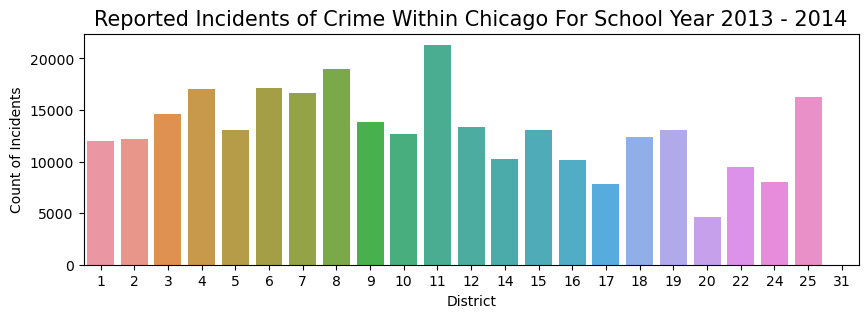

In [45]:
sns.set_palette(palette='tab10')
plt.figure(figsize=(10,3))
sns.countplot(x = CC1314['District'])

plt.title('Reported Incidents of Crime Within Chicago For School Year 2013 - 2014', size = 15);
plt.xlabel('District');
plt.ylabel('Count of Incidents');

Missing data from districts 13, 21, 23, and no clue what that district 31 is.

Update:  On the Chicago Police website, there are no districts 13, 21, or 23.
    Looks as though police district 13 was closed at the end of 2012 and was combined with district 12.
    District 21 was also absorbed by nearby districts.
    District 23 was absorbed by district 19.
    
Specific data on which districts absorbed which seems to be lacking.

The same process was completed to view Reported Incidents of Crime Within Chicago for the School Years:  2014-2015, ..., 2021-2022. Minor fluctuations between the years, but there was nothing too different from the 2013-2014 graphic.

With the basic exporatory analysis out of the way, the topic of focus will be comparing the reported incidents of crime within Chicago against the number of misconducts per school per school year.

The joining of the above data sets and subsequent analysis will be in the upcoming ETL report.